# Theil-Sen Regression

In [1]:
import os 
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, RANSACRegressor, TheilSenRegressor, HuberRegressor, Ridge
from sklearn.svm import LinearSVR

In [2]:
dea_fc = pd.read_csv('../DATASETS/DEA_FC_PROCESSED/MODELLED_PREPROCESSED/Input_DataSet_NSABBS0001.csv', parse_dates= ['time'], usecols = ['time', 'pv_filter'])

In [3]:
dea_fc.set_index('time', inplace = True)

In [4]:
dea_fc

,pv_filter
time,
1987-09-09,44.139452
1987-09-25,44.408384
1987-10-11,42.488953
1987-11-12,39.641118
1987-11-28,36.871701
...,...
2022-11-04,62.710595
2022-11-20,63.146183
2022-11-28,63.027586


In [5]:
dea_fc['counter'] = range(1, len(dea_fc)+1) # Add 1-len(dea_fc) just for the linear regression

In [6]:
FEATURES = ['counter']
TARGET = ['pv_filter']

X = dea_fc[FEATURES]
y = np.array(dea_fc[TARGET]).ravel()

In [7]:
lin_reg = LinearRegression().fit(X, y)
dea_fc['lin_reg'] = lin_reg.predict(X)

theil_sen_reg = TheilSenRegressor(random_state = 1).fit(X, y)
dea_fc['theil_sen_reg'] = theil_sen_reg.predict(X)

huber_regressor = HuberRegressor().fit(X,y)
dea_fc['huber_regressor'] = huber_regressor.predict(X)

<Axes: xlabel='time'>

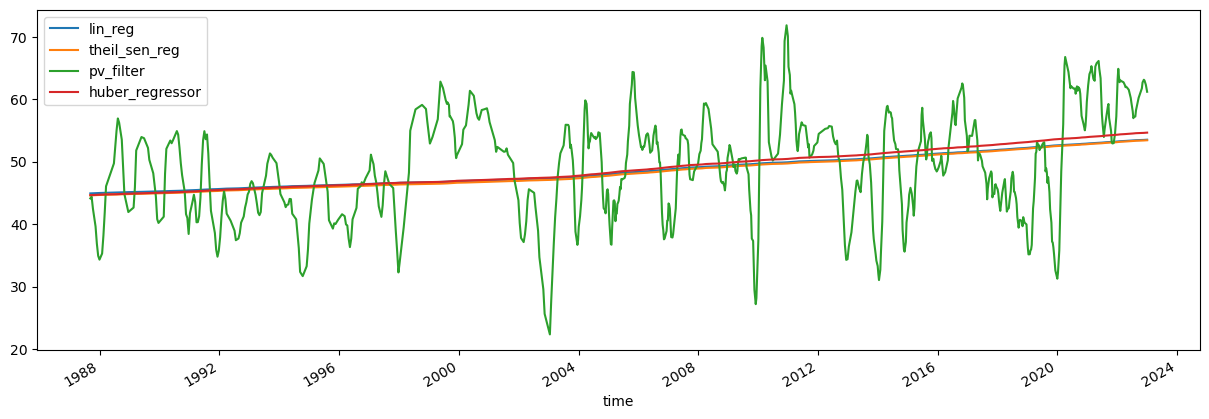

In [8]:
dea_fc.plot( y = ['lin_reg', 'theil_sen_reg', 'pv_filter', 
                  'huber_regressor'], figsize = (15,5))

In [11]:
theil_sen_reg.coef_, huber_regressor.coef_, lin_reg.coef_, 

(array([0.01107963]), array([0.01256662]), array([0.01078992]))